# Housing Price Prediction

##### Notebook to predict the price of houses, using a USA housing dataset. To explore and analyze this dataset effectively univariate, bivariate, and multivariate statistics are performed.

## A) Import Libraries
In this section we import the libraries that will be used throughout the notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy import stats
from sklearn import preprocessing
#from sklearn.preprocessing import MinMaxScaler

## B) Load Dataset
In this section we load the full housing dataset using pandas .read_csv().

In [2]:
data = pd.read_csv('http://www.ishelp.info/data/housing_full.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## C) Basic Cleaning
We proceed to clean the dataset for the analysis. 

In [3]:
def basicClean(df):
    df.drop(columns = ['Id'], inplace = True)
    df.dropna(axis = 1, inplace = True)

    for col in df:
        if col[0].isdigit():
            nums = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
            df.rename(columns={col:nums[int(col[0])] + '_' + col}, inplace=True)
    
    return df
basicClean(data)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,three_3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


## D) Data Exploration
#### 1) Univariate Statistics
We use Univariate analysis to explore each variable in a data set, separately. We look at the range of values, as well as the central tendency of the values. This way we can describe the patterns of response to the variable.

In [4]:
def unistats(ds):
    output_data = pd.DataFrame(columns = ['Count', 'Missing', 'Unique', 'Dtype', 'Numeric', 'Mean', 'Mode', 'Min', '25%', 'Median', '75%', 'Max', 'Std','Skew', 'Kurt'])
    for col in ds:
        if pd.api.types.is_numeric_dtype(ds[col]):
            output_data.loc[col] = [ds[col].count(), ds[col].isnull().sum(), ds[col].nunique(), ds[col].dtype, pd.api.types.is_numeric_dtype(ds[col]),
                                    ds[col].mode().values[0], ds[col].mean(), ds[col].min(), ds[col].quantile(0.25), ds[col].median(), ds[col].quantile(0.75),
                                    ds[col].max(), ds[col].std(), ds[col].skew(), ds[col].kurt()]
            
        else:
            output_data.loc[col] = [ds[col].count(), ds[col].isnull().sum(), ds[col].nunique(), ds[col].dtype, pd.api.types.is_numeric_dtype(ds[col]), 
                                    ds[col].mode().values[0], '-', '-', '-', '-', '-', '-', '-', '-', '-']

    return output_data.sort_values(by=['Numeric', 'Skew', 'Unique'], ascending = False)

#test the function
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
unistats(data)

,Count,Missing,Unique,Dtype,Numeric,Mean,Mode,Min,25%,Median,75%,Max,Std,Skew,Kurt
MiscVal,1460,0,21,int64,True,0,43.489,0,0,0,0,15500,496.123,24.4768,701.003
PoolArea,1460,0,8,int64,True,0,2.7589,0,0,0,0,738,40.1773,14.8284,223.268
LotArea,1460,0,1073,int64,True,7200,10516.8,1300,7553.5,9478.5,11601.5,215245,9981.26,12.2077,203.243
three_3SsnPorch,1460,0,20,int64,True,0,3.40959,0,0,0,0,508,29.3173,10.3043,123.662
LowQualFinSF,1460,0,24,int64,True,0,5.84452,0,0,0,0,572,48.6231,9.01134,83.2348
KitchenAbvGr,1460,0,4,int64,True,1,1.04658,0,1,1,1,3,0.220338,4.4884,21.5324
BsmtFinSF2,1460,0,144,int64,True,0,46.5493,0,0,0,0,1474,161.319,4.25526,20.1133
ScreenPorch,1460,0,76,int64,True,0,15.061,0,0,0,0,480,55.7574,4.12221,18.4391
BsmtHalfBath,1460,0,3,int64,True,0,0.0575342,0,0,0,0,2,0.238753,4.1034,16.3966
EnclosedPorch,1460,0,120,int64,True,0,21.9541,0,0,0,0,552,61.1191,3.08987,10.4308


### 2) Plots

#### Heteroscedasticity
While heteroscedasticity can cause our coefficient estimates to be less precise. Lower precision increases the likelihood that the coefficient estimates are further from the correct population value.

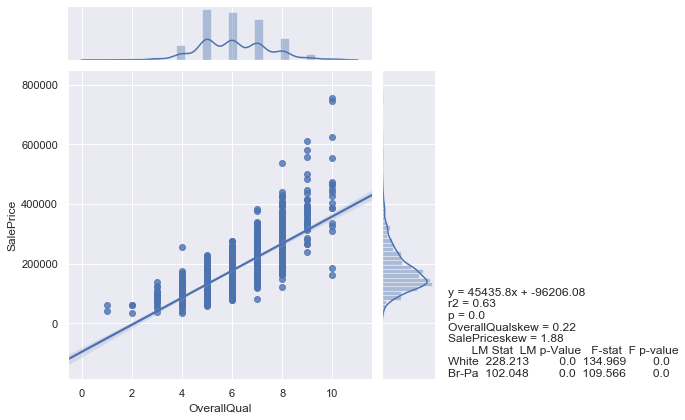

In [5]:
def heteroscedasticity(df, feature, label):
    #import statsmodels.api as sm
    #import pandas as pd
    from statsmodels.stats.diagnostic import het_breuschpagan
    from statsmodels.stats.diagnostic import het_white
    from statsmodels.formula.api import ols
    
    model = ols(formula=(label + '~' + feature), data=df).fit()
    output = pd.DataFrame(columns = ['LM Stat', 'LM p-Value', 'F-stat', 'F p-value'])
    
    try:
        whiteTest = het_white(model.resid, model.model.exog)
        output.loc['White'] = whiteTest
    except:
        print('Unable to run white test of hetroscedasticity')
        
    bpTest = het_breuschpagan(model.resid, model.model.exog)
    output.loc['Br-Pa'] = bpTest
    
    return output.round(3)
    

def scatter(feature, label):
    
    #calculatina the regression line
    m, b, r, p, err = stats.linregress(feature, label)
    textstr = 'y = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
    textstr += 'r2 = ' + str(round(r**2, 2)) + '\n'
    textstr += 'p = ' + str(round(p, 2)) + '\n'
    textstr += str(feature.name) + 'skew = ' + str(round(feature.skew(), 2)) + '\n' 
    textstr += str(label.name) + 'skew = ' + str(round(label.skew(), 2)) + '\n' 
    textstr += str(heteroscedasticity(pd.DataFrame(label).join(pd.DataFrame(feature)), feature.name, label.name))
    
    sns.set(color_codes = True )
    ax = sns.jointplot(feature, label, kind = 'reg') 
    ax.fig.text(1, 0.114, textstr, fontsize=12, transform=plt.gcf().transFigure)
    plt.show()

    
scatter(data.OverallQual, data.SalePrice)

Heteroscedasticity tends to produce p-values that are smaller than they should be, which is something to avoid in DS. Heteroscedasticity increases the variance of the coefficient estimates but the Ordanary Least Squares procedure does not detect this increase. Ordanary Least Squares calculates the t-values and F-values using an underestimated amount of variance.

### 3) Barcharts

'AllPub' n -1459; 'NoSeWa' n-1no test was preformed


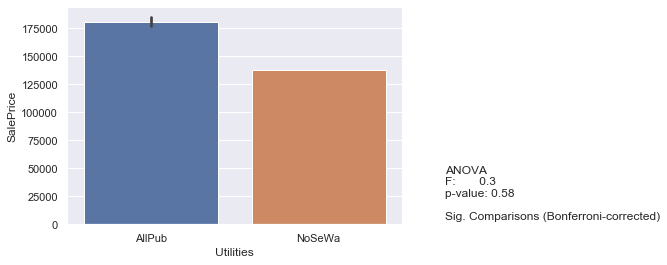

In [6]:
def barChart(df, feature, label):
    #import pandas as pd
    #import seaborn as sns
    #from scipy import stats 
    #from matplotlib import pyplot as plt
    #from scipy import stats
    
    groups = df[feature].unique()
    dfGrouped = df.groupby(feature)
    groupLabels = []
    for g in groups:
        gList = dfGrouped.get_group(g)
        groupLabels.append(gList[label])
        
    #Calc ANOVA
    oneway = stats.f_oneway(*groupLabels)
        
    #T-test with bonferroni correction for p-value threshold
    uniqueGroups = df[feature].unique()
    ttests= []
        
    for i, group in enumerate(uniqueGroups):
        for i2, group2 in enumerate(uniqueGroups):
            if i2 > i:
                type1 = df[df[feature] == group]
                type2 = df[df[feature] == group2]
                    
                #there must be more than 1 case in order to preform a ttest
                    
                if len(type1[label]) < 2 or len(type2[label]) < 2:
                    print("'" + group + "' n -" + str(len(type1)) + "; '" + group2 +"' n-" + str(len(type2)) + "no test was preformed")
                else:
                    t, p = stats.ttest_ind(type1[label], type2[label])
                    ttests.append([group, group2, t.round(4), p.round(4)])
                    
    if len(ttests) > 0:
        pThreshold = 0.05 / len(ttests) #beonferroni-corrected p-vañue determined
    else: 
        pThreshold = 0.05
        
    #derescriptyions
    #calculatina the regression line
    textstr = 'ANOVA' + '\n'
    textstr += 'F:       ' + str(oneway[0].round(2)) + '\n'
    textstr += 'p-value: ' + str(oneway[1].round(2)) + '\n\n'
    textstr += 'Sig. Comparisons (Bonferroni-corrected)' + '\n' 
        
    for ttest in ttests:
        if ttest[3] <= pThreshold:
            textstr += ttest[0] + '-' + ttest[1] + ': t-' + str(ttest[2]) + ', p:' + str(ttest[3]) + '\n'
    ax = sns.barplot(df[feature], df[label])
    ax.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
    plt.show()

barChart(data, 'Utilities', 'SalePrice')
            

### 4) Bivariate Stats:.
In Bivariate analysis we aim to understand the relationship between two variables x and y. In this section of the notebook we the following processes: 
* Numeric to numeric: Correlation.
* Numeric to categorical: One way ANOVA (3+ groups) or t-test (2-groups).
* Categorical to categorical: Chi-Square.

#### ANOVA

In [7]:
def anova(df, feature, label):
    #from scipy import stats
    
    groups = df[feature].unique()
    dfGrouped = df.groupby(feature)
    groupLabels = []
    for g in groups:
        gList = dfGrouped.get_group(g)
        groupLabels.append(gList[label])
        
    return stats.f_oneway(*groupLabels)
        

#### Bivariate Stats

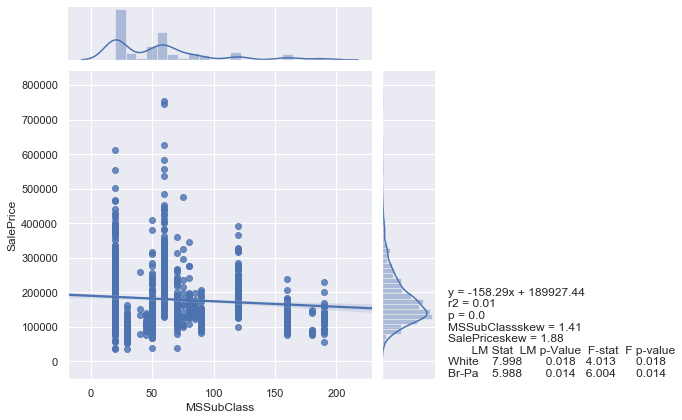

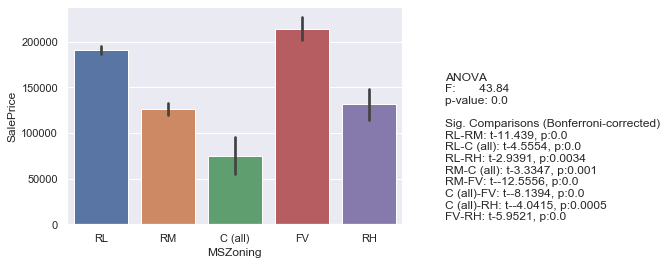

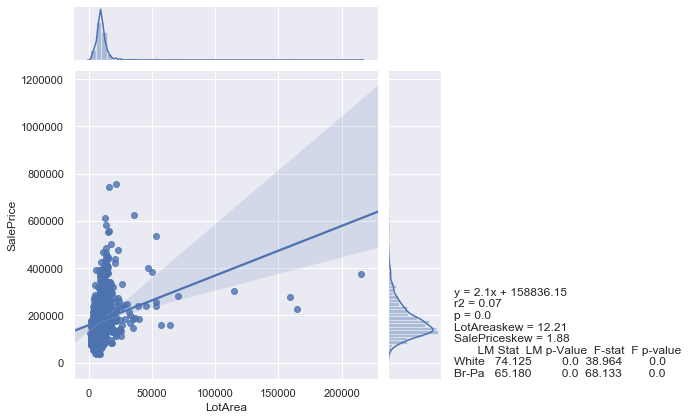

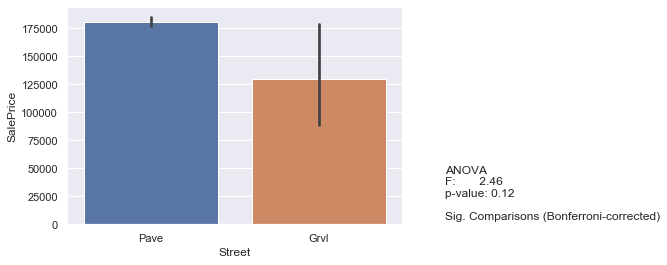

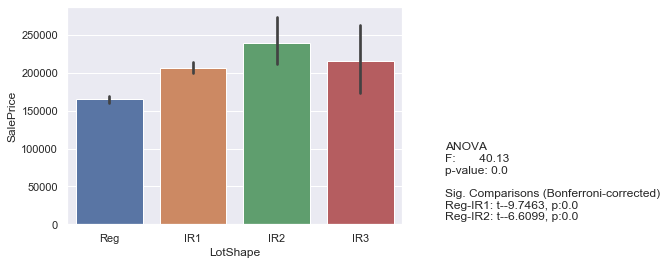

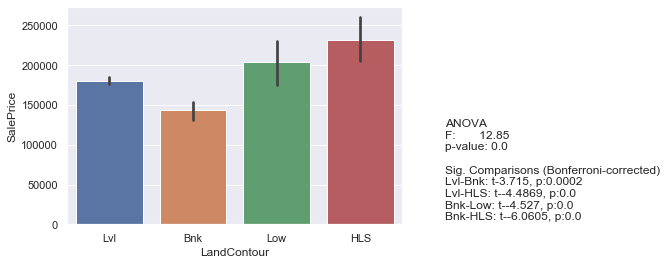

'AllPub' n -1459; 'NoSeWa' n-1no test was preformed


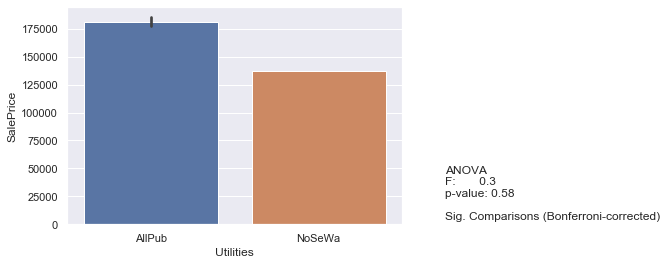

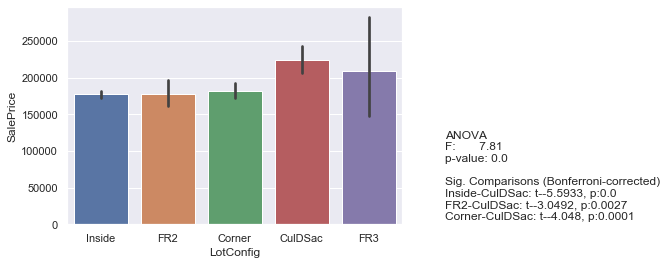

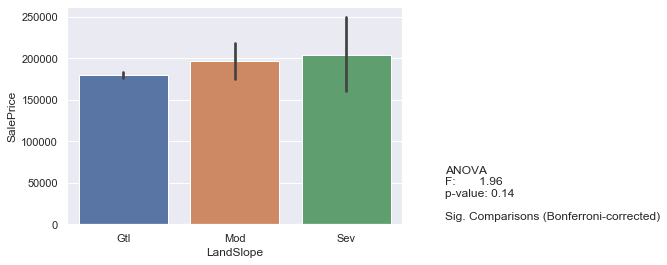

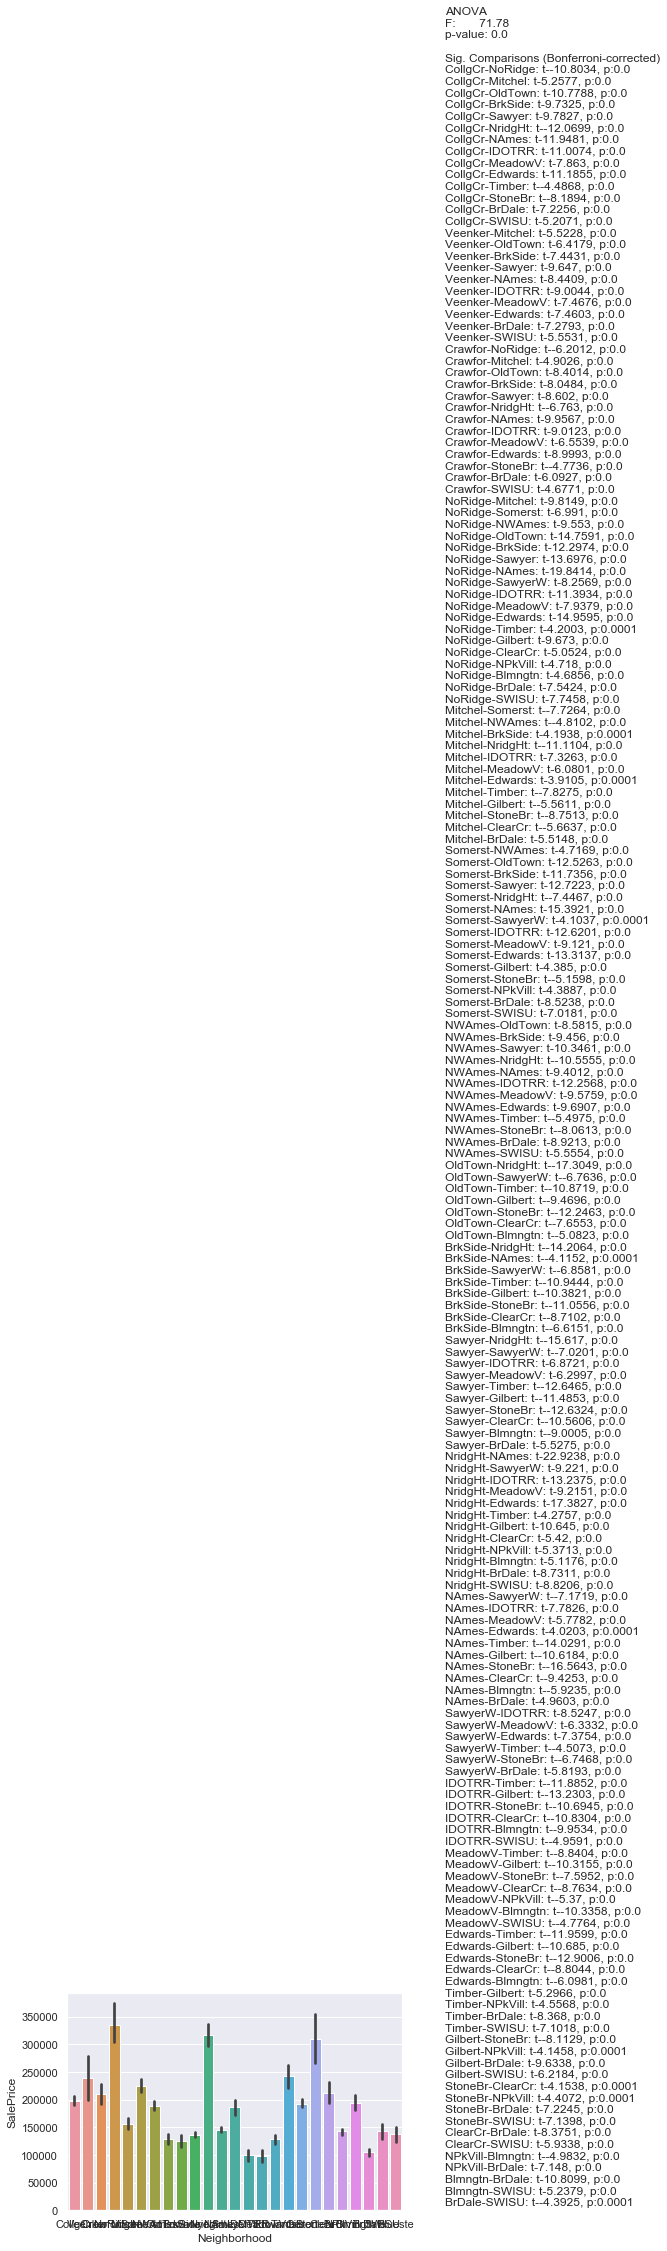

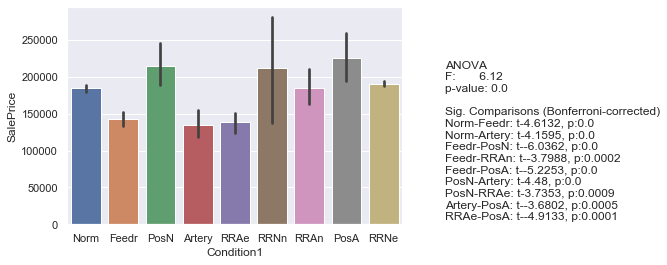

'Norm' n -1445; 'PosA' n-1no test was preformed
'Norm' n -1445; 'RRAn' n-1no test was preformed
'Norm' n -1445; 'RRAe' n-1no test was preformed
'Artery' n -2; 'PosA' n-1no test was preformed
'Artery' n -2; 'RRAn' n-1no test was preformed
'Artery' n -2; 'RRAe' n-1no test was preformed
'RRNn' n -2; 'PosA' n-1no test was preformed
'RRNn' n -2; 'RRAn' n-1no test was preformed
'RRNn' n -2; 'RRAe' n-1no test was preformed
'Feedr' n -6; 'PosA' n-1no test was preformed
'Feedr' n -6; 'RRAn' n-1no test was preformed
'Feedr' n -6; 'RRAe' n-1no test was preformed
'PosN' n -2; 'PosA' n-1no test was preformed
'PosN' n -2; 'RRAn' n-1no test was preformed
'PosN' n -2; 'RRAe' n-1no test was preformed
'PosA' n -1; 'RRAn' n-1no test was preformed
'PosA' n -1; 'RRAe' n-1no test was preformed
'RRAn' n -1; 'RRAe' n-1no test was preformed


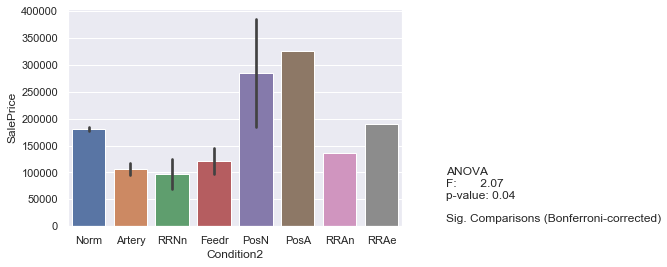

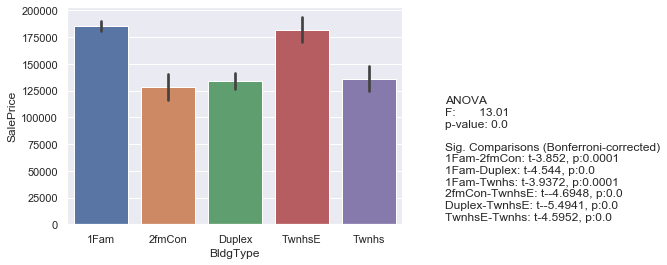

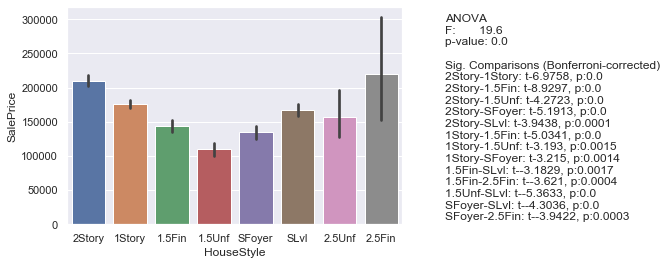

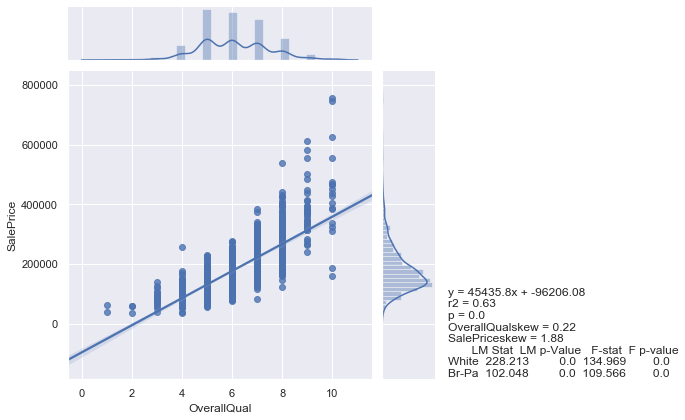

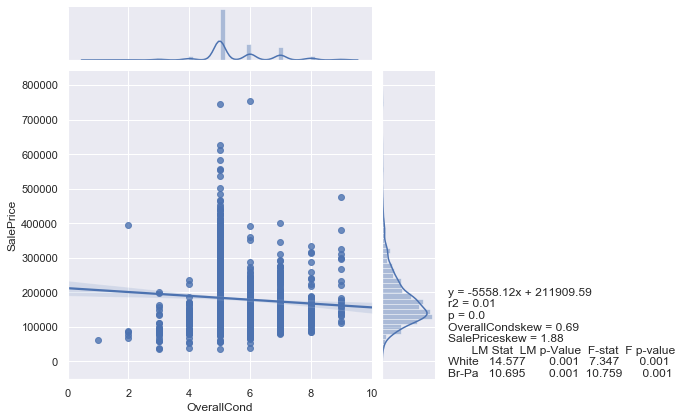

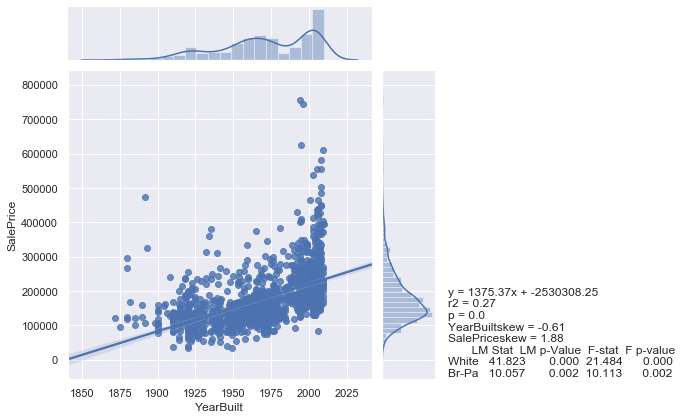

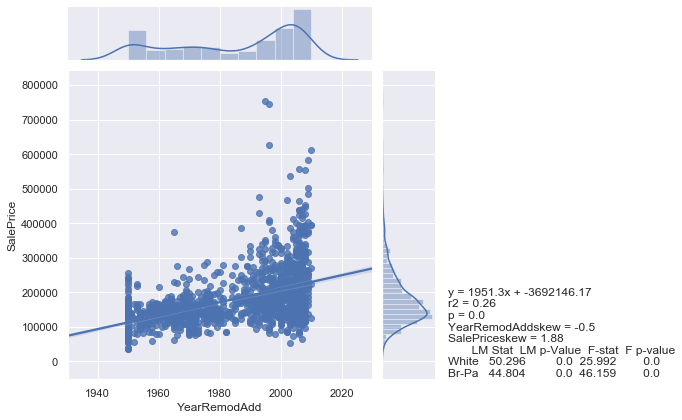

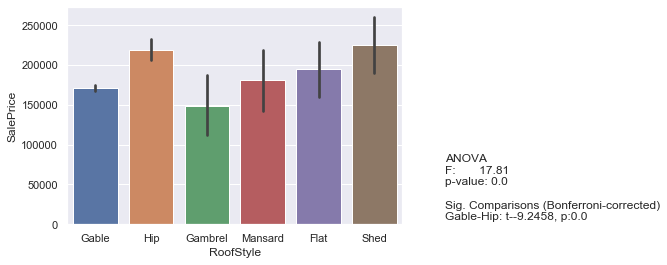

'CompShg' n -1434; 'Metal' n-1no test was preformed
'CompShg' n -1434; 'Membran' n-1no test was preformed
'CompShg' n -1434; 'Roll' n-1no test was preformed
'CompShg' n -1434; 'ClyTile' n-1no test was preformed
'WdShngl' n -6; 'Metal' n-1no test was preformed
'WdShngl' n -6; 'Membran' n-1no test was preformed
'WdShngl' n -6; 'Roll' n-1no test was preformed
'WdShngl' n -6; 'ClyTile' n-1no test was preformed
'Metal' n -1; 'WdShake' n-5no test was preformed
'Metal' n -1; 'Membran' n-1no test was preformed
'Metal' n -1; 'Tar&Grv' n-11no test was preformed
'Metal' n -1; 'Roll' n-1no test was preformed
'Metal' n -1; 'ClyTile' n-1no test was preformed
'WdShake' n -5; 'Membran' n-1no test was preformed
'WdShake' n -5; 'Roll' n-1no test was preformed
'WdShake' n -5; 'ClyTile' n-1no test was preformed
'Membran' n -1; 'Tar&Grv' n-11no test was preformed
'Membran' n -1; 'Roll' n-1no test was preformed
'Membran' n -1; 'ClyTile' n-1no test was preformed
'Tar&Grv' n -11; 'Roll' n-1no test was preform

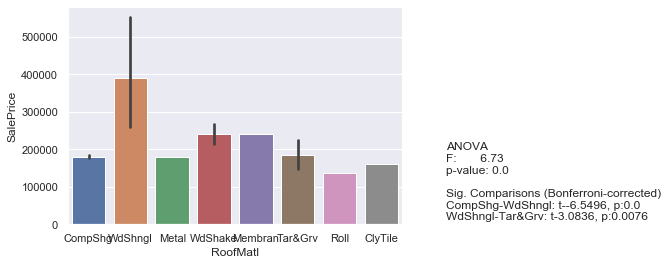

'VinylSd' n -515; 'AsphShn' n-1no test was preformed
'VinylSd' n -515; 'ImStucc' n-1no test was preformed
'VinylSd' n -515; 'CBlock' n-1no test was preformed
'MetalSd' n -220; 'AsphShn' n-1no test was preformed
'MetalSd' n -220; 'ImStucc' n-1no test was preformed
'MetalSd' n -220; 'CBlock' n-1no test was preformed
'Wd Sdng' n -206; 'AsphShn' n-1no test was preformed
'Wd Sdng' n -206; 'ImStucc' n-1no test was preformed
'Wd Sdng' n -206; 'CBlock' n-1no test was preformed
'HdBoard' n -222; 'AsphShn' n-1no test was preformed
'HdBoard' n -222; 'ImStucc' n-1no test was preformed
'HdBoard' n -222; 'CBlock' n-1no test was preformed
'BrkFace' n -50; 'AsphShn' n-1no test was preformed
'BrkFace' n -50; 'ImStucc' n-1no test was preformed
'BrkFace' n -50; 'CBlock' n-1no test was preformed
'WdShing' n -26; 'AsphShn' n-1no test was preformed
'WdShing' n -26; 'ImStucc' n-1no test was preformed
'WdShing' n -26; 'CBlock' n-1no test was preformed
'CemntBd' n -61; 'AsphShn' n-1no test was preformed
'Cemnt

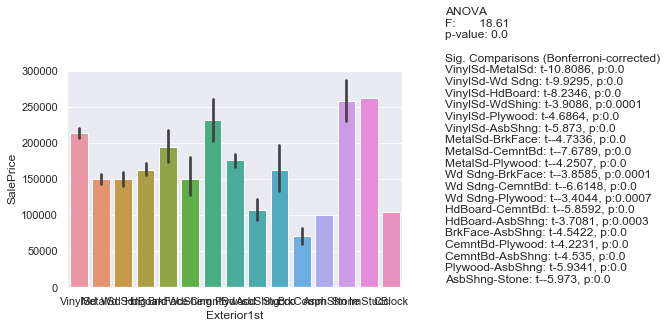

'VinylSd' n -504; 'Other' n-1no test was preformed
'VinylSd' n -504; 'CBlock' n-1no test was preformed
'MetalSd' n -214; 'Other' n-1no test was preformed
'MetalSd' n -214; 'CBlock' n-1no test was preformed
'Wd Shng' n -38; 'Other' n-1no test was preformed
'Wd Shng' n -38; 'CBlock' n-1no test was preformed
'HdBoard' n -207; 'Other' n-1no test was preformed
'HdBoard' n -207; 'CBlock' n-1no test was preformed
'Plywood' n -142; 'Other' n-1no test was preformed
'Plywood' n -142; 'CBlock' n-1no test was preformed
'Wd Sdng' n -197; 'Other' n-1no test was preformed
'Wd Sdng' n -197; 'CBlock' n-1no test was preformed
'CmentBd' n -60; 'Other' n-1no test was preformed
'CmentBd' n -60; 'CBlock' n-1no test was preformed
'BrkFace' n -25; 'Other' n-1no test was preformed
'BrkFace' n -25; 'CBlock' n-1no test was preformed
'Stucco' n -26; 'Other' n-1no test was preformed
'Stucco' n -26; 'CBlock' n-1no test was preformed
'AsbShng' n -20; 'Other' n-1no test was preformed
'AsbShng' n -20; 'CBlock' n-1no t

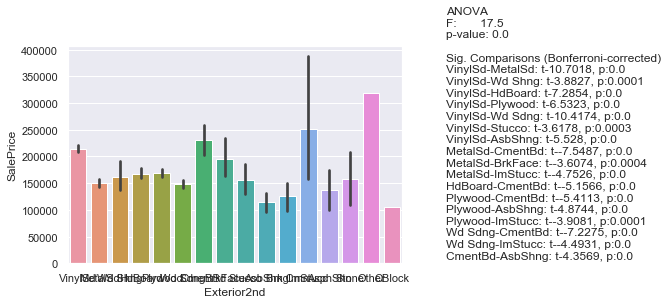

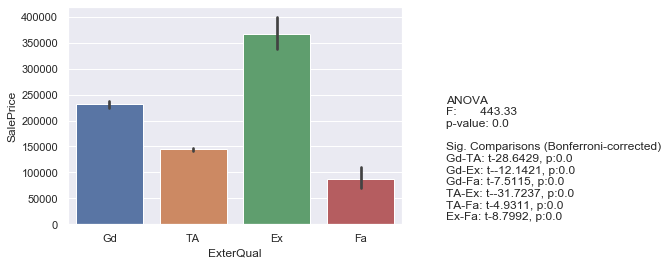

'TA' n -1282; 'Po' n-1no test was preformed
'Gd' n -146; 'Po' n-1no test was preformed
'Fa' n -28; 'Po' n-1no test was preformed
'Po' n -1; 'Ex' n-3no test was preformed


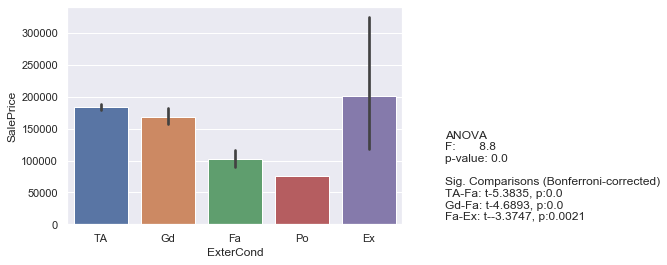

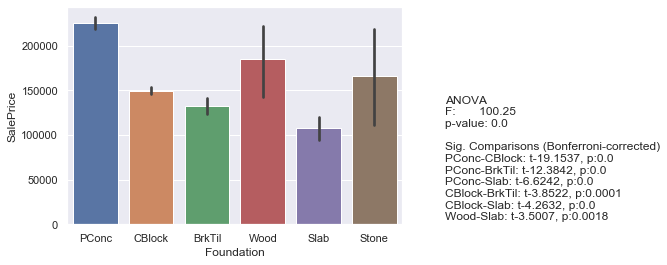

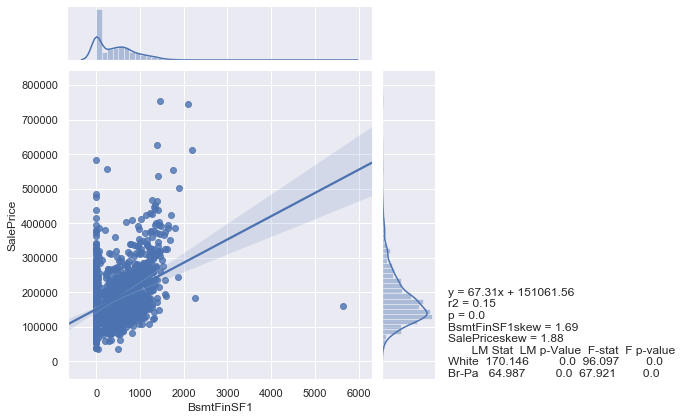

In [ ]:
def bivarstats(dataset, label):
    from scipy import stats
    #import pandas as pd
    
    output = pd.DataFrame(columns = ['Stat', '+/-', 'Effect Size', 'p-value'])
    
    for col in dataset:
        if not col == label:
            if dataset[col].isnull().sum() == 0:
                if pd.api.types.is_numeric_dtype(dataset[col]):
                    r, p = stats.pearsonr(dataset[label], dataset[col])
                    output.loc[col] = ['r', np.sign(r), abs(round(r, 6)), round(p, 6)]
                    scatter(dataset[col], dataset[label])
                else: 
                    F, p = anova(dataset[[col, label]], col, label)
                    output.loc[col] = ['F', '', round(F, 6), round(p, 6)]
                    barChart(dataset, col, label)
            else: 
                output.loc[col] = [np.nan, np.nan, np.nan, 'nulls']
    
    return output.sort_values(by = ['Stat', 'Effect Size'], ascending = [False, False])   
    #return output.reindex(output.r.abs().sort_values(ascending = False).index)

#dataset = pd.read_csv('http://www.ishelp.info/data/housing_full.csv')
bivarstats(data, 'SalePrice')


#### Multivariate Statistics
In constrast to the previous section, in this part of the notebook we analyze more than two variables simultanously. The process is divided in four parts.

#### Data Preparation.
In this the data is prepared for the multivariate statistics.

In [ ]:
def mirPrep(df, label):
    for col in df:
        if not pd.api.types.is_numeric_dtype(df[col]):
            df = df.join(pd.get_dummies(df[col], prefix = col, drop_first = False))

    df = df.select_dtypes(np.number)
    dfMinMax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df), columns = df.columns)
    return dfMinMax

data2 = pd.read_csv('http://www.ishelp.info/data/housing_full.csv')
data2 = basicClean(data2)
df = mirPrep(data2,'SalePrice')

A For loop is executed where we get the dummy variables of every columns where the values are not numeric, we add the dummy variables to our dataFrame. 
In the second block we select all the data in all the columns where the values are numeric. Lastly we save in "dfMinMax" we standardize features by removing the mean and scaling to unit variance and we fit to data in dataFrame, then transform it.

#### Ordinary Least Squares

In this function we exceute the Ordianry Least Squares where our endog = y, and exog = x, where y is the Sales Price and y is the dataFrame minus Sales Price.

In [ ]:
def mir(df, label):
    y = df[label]
    x = df.drop(columns = [label]).assign(const = 1)
    #x.head()
    output = sm.OLS(y, x).fit()
    return output#.summary()

results = mir(df, 'SalePrice')

#### Dataset Features

In this function block we create a dataFrame from a dictornary. In coef the parameters of results are stored, in t the t-vales of results, and in p the p values.

In [ ]:
def mirFeat(results):
    dfFeatures = pd.DataFrame({'coef': results.params, 't':abs(results.tvalues), 'p':results.pvalues})
    dfFeatures.drop(labels =['const'], inplace=True)
    dfFeatures = dfFeatures.sort_values(by=['t', 'p'])
    return dfFeatures
dfFeatures = mirFeat(results)

### Fit
We excecute the mirFeat() function with in this function block. Then we save the difference actual values with the fitted values. Later we get the Root-mean-square deviation (RMSE) of the residuals vs the actual, and the Mean Absolute Error (MAE) of the actual vs results.

In [ ]:
def mirFit(results, actual, roundto=10):
    dfFeatures = mirFeat(results)
    residuals = np.array(actual) - np.array(results.fittedvalues)
    rmse = np.sqrt(sum(residuals**2)/len(actual))
    mae = np.mean(abs(np.array(actual) - np.array(results.fittedvalues)))
    fitStats = [round(results.rsquared, roundto), round(results.rsquared_adj, roundto), 
                round(results.rsquared - results.rsquared_adj, roundto), round(rmse, roundto), 
                round(mae, roundto), [dfFeatures.index.values]]
    return fitStats
fitMetrics = mirFit(results, df['SalePrice']) 
fitMetrics

## E) Model Generation
In this section we save our models to a csv that we can furture analyze.

In [ ]:
def mirStep(df, label, min=2):
    dfModels = pd.DataFrame(columns=['R2', 'R2a', 'diff', 'RSME', 'MAE', 'feature'])
    df = mirPrep(df, label)
    
    results = mir(df, label)
    
    dfModels.loc[str(len(results.params))] = mirFit(results, df[label], 10)
    dfFeatures = mirFeat(results)
    
    while len(results.params) >= min:
        df = df.drop(columns=[dfFeatures.index[0]])
        results = mir(df, label)
        dfFeatures = mirFeat(results)
        dfModels.loc[len(results.params)] = mirFit(results, df[label], 10)
        
    #dfModels.to_csv('./Music/Portfolio/HousePrices/' + label +'.csv')
    dfModels.to_csv('filename.csv')
    #dfModels.drop(columns = ['features'], inplace = True)
    return dfModels

In [ ]:
dfModels = mirStep(df, 'SalePrice', 2)

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
ax = sns.lineplot(dfModels.index, dfModels.R2)
ax = sns.lineplot(dfModels.index, dfModels.R2a)
ax.set(ylim=(0.88, 0.921))